In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

In [12]:
x = 6 * np.random.rand(200, 1) - 3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.rand(200, 1)

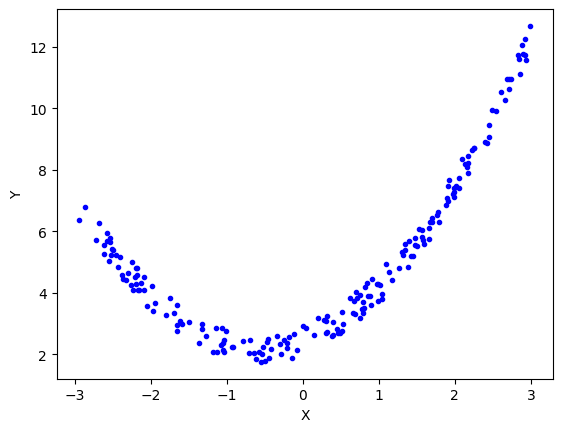

In [13]:
plt.plot(x, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state = 2)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = lr.predict(x_test)

In [18]:
r2_score(y_test, y_pred)

0.3281901264534589

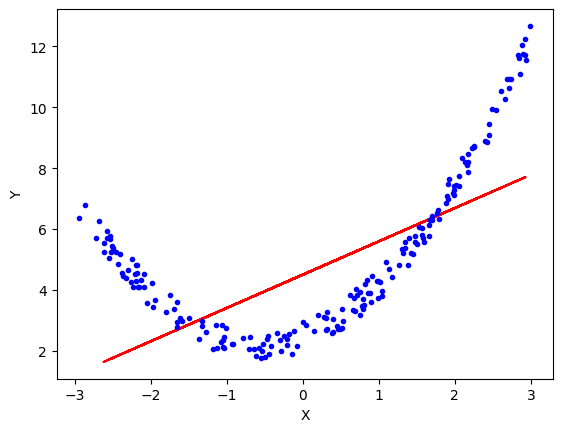

In [19]:
plt.plot(x_train, lr.predict(x_train), color = 'r')
plt.plot(x, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [21]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [22]:
print(x_train[0])
print(x_train_trans[0])

[-1.61787649]
[ 1.         -1.61787649  2.61752433]


In [23]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y_pred = lr.predict(x_test_trans)

In [27]:
r2_score(y_test, y_pred)

0.9856764760142578

In [28]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.92778547 0.77813632]]
[2.48286804]


In [29]:
x_new = np.linspace(-3,3,200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

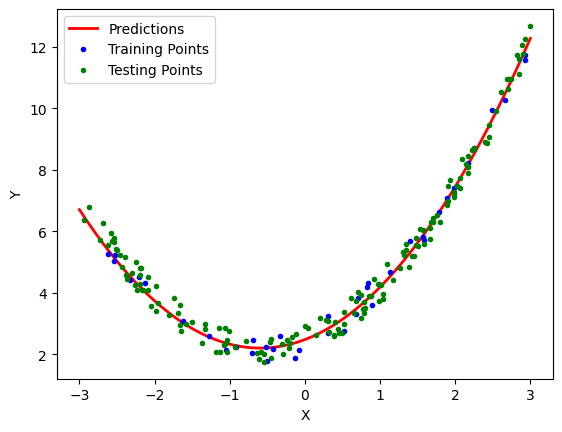

In [30]:
plt.plot(x_new, y_new, "r-", linewidth=2, label ="Predictions")
plt.plot(x_train, y_train, "b.", label = "Training Points")
plt.plot(x_test, y_test, "g.", label = "Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [33]:
def polynomial_regression(degree):
    x_new = np.linspace(-3,3,100).reshape(100,1)
    x_new_poly = poly.transform(x_new)

    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scsaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(x, y)
    y_newbig  = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig, "r", label = "Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc = "upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-3,3,0,10])
    plt.show()

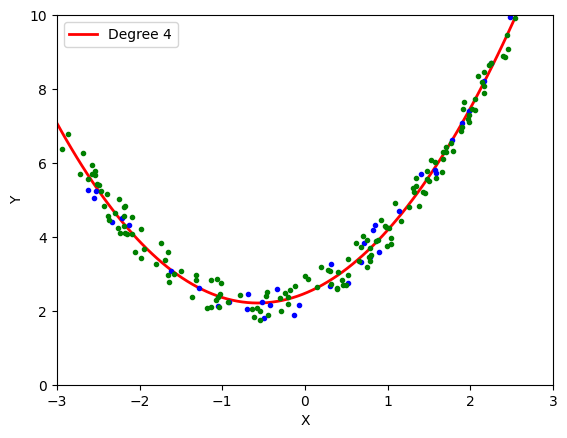

In [35]:
polynomial_regression(4)